In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import mglearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

np.random.seed(0)

# feature scaling
num_classes = 10
data, target = load_digits(return_X_y=True)
target_names = load_digits().target_names 
num_features = data.shape[1]
scaler = StandardScaler() 
scaler.fit(data)
X_scaled = scaler.transform(data)
num_init = 10
RS = 10

Adjust Rand index is 0.46635762889727506


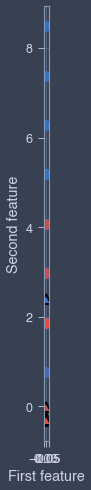

In [49]:
# kmeans without pca
kmeans = KMeans(n_clusters=num_classes, random_state=RS, n_init = num_init) 
kmeans.fit(X_scaled)

print("Adjust Rand index is {}".format(adjusted_rand_score(target, kmeans.labels_)))

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.arange(num_classes), markers='^', markeredgewidth=2)

Original shape: (1797, 64)
Reduced shape: (1797, 64)


Text(0, 0.5, 'Second principal component')

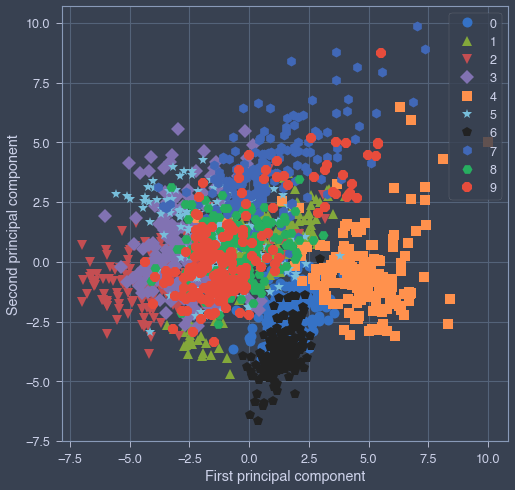

In [50]:
# Apply pca to scaled data

pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_scaled_pca.shape)))
#print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

# plot the first and second PCs
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], target) 
plt.legend(target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")




In [51]:
# external evaluation


adRand = np.zeros((num_features, 1))
FM = np.zeros((num_features, 1))
for i in np.arange(num_features):
    # build the clustering model for the first i PCs
    pca_kmeans = KMeans(n_clusters=num_classes, random_state=RS, n_init = num_init) 
    pca_kmeans.fit(X_scaled_pca[:, :i+1])
    adRand[i] = adjusted_rand_score(target, pca_kmeans.labels_)
    FM[i] = fowlkes_mallows_score(target, pca_kmeans.labels_) 
    


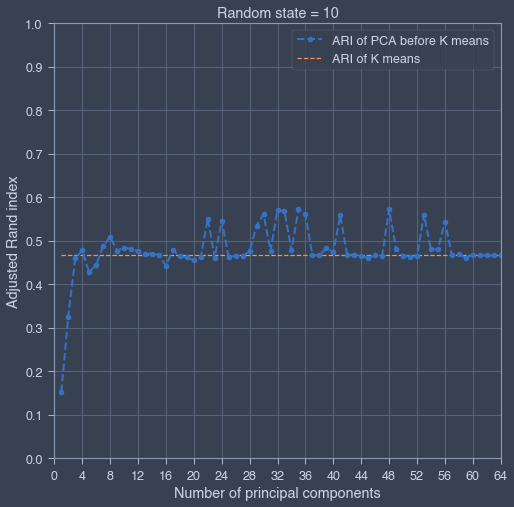

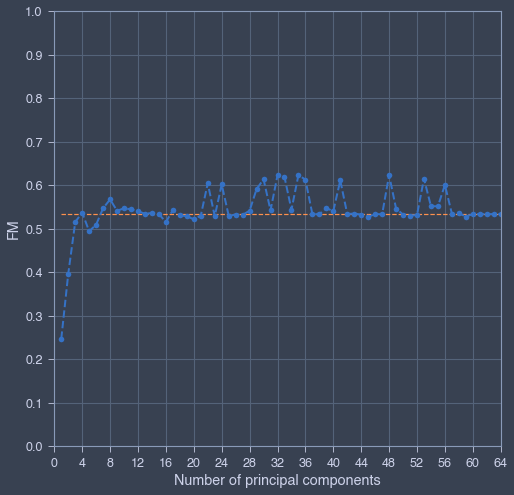

In [64]:
plt.figure(figsize=(8, 8))
plt.ylim(0,1)
plt.xlim(0, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted Rand index")
plt.hlines(adjusted_rand_score(target, kmeans.labels_), 1, num_features, color = "y",linestyle='--', label = "ARI of K means")
plt.plot(np.arange(1, num_features+1), adRand, linestyle='--', marker='o', linewidth=2, label = "ARI of PCA before K means")
plt.legend(loc='upper right')
plt.title("Random state = {}".format(RS))
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

#plt.title()

plt.figure(figsize=(8, 8))
plt.ylim(0,1)
plt.xlim(0, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("FM")
plt.hlines(fowlkes_mallows_score(target, kmeans.labels_), 1, num_features, color = "y",linestyle='--')
plt.plot(np.arange(1, num_features+1), FM, linestyle='--', marker='o', linewidth=2)

x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

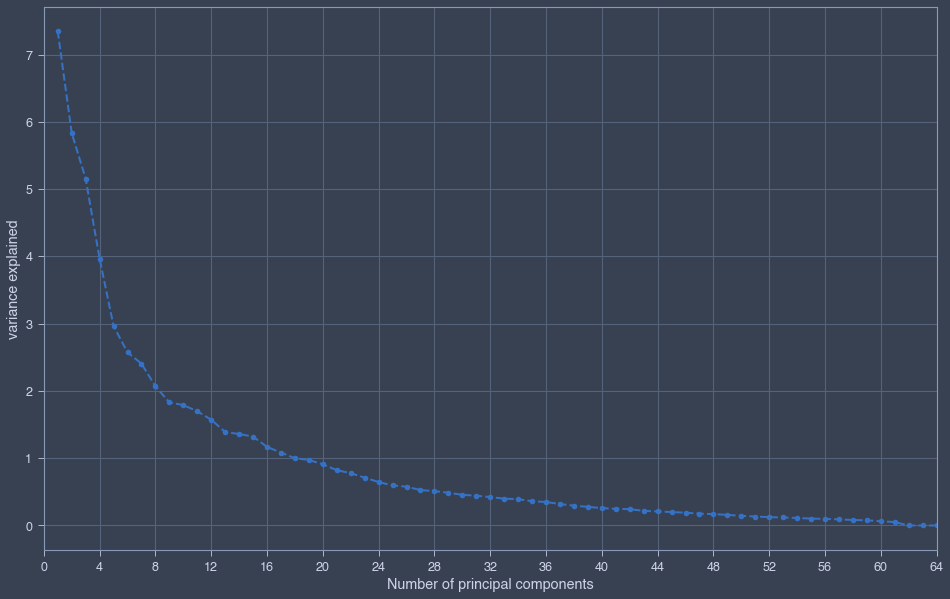

In [47]:
plt.figure(figsize=(16, 10))
#plt.ylim(0,1)
plt.xlim(0, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("variance explained")
plt.plot(np.arange(1, num_features+1), pca.explained_variance_, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

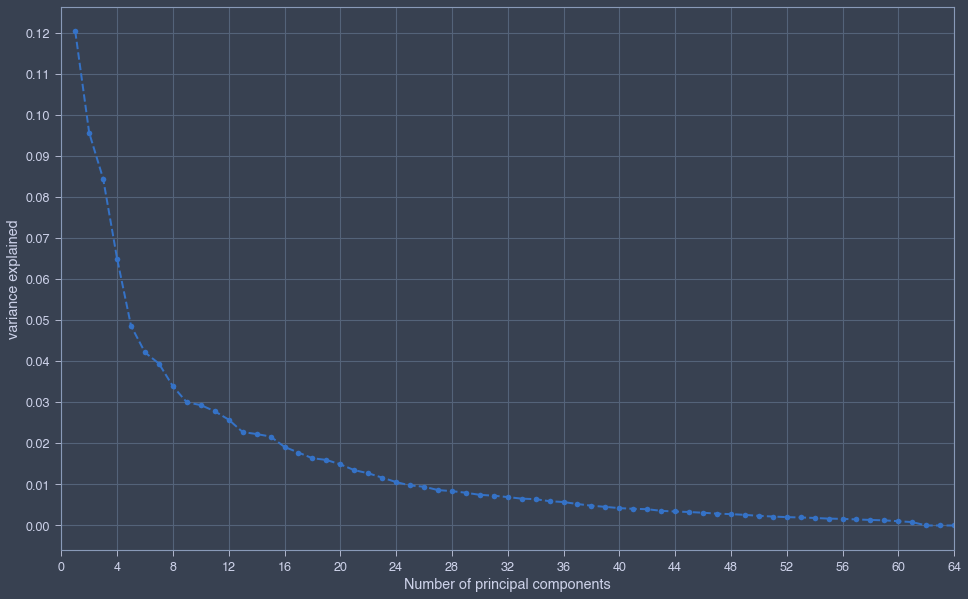

In [57]:
plt.figure(figsize=(16, 10))
#plt.ylim(0,1)
plt.xlim(0, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("variance explained")
plt.plot(np.arange(1, num_features+1), pca.explained_variance_ratio_, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.01)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

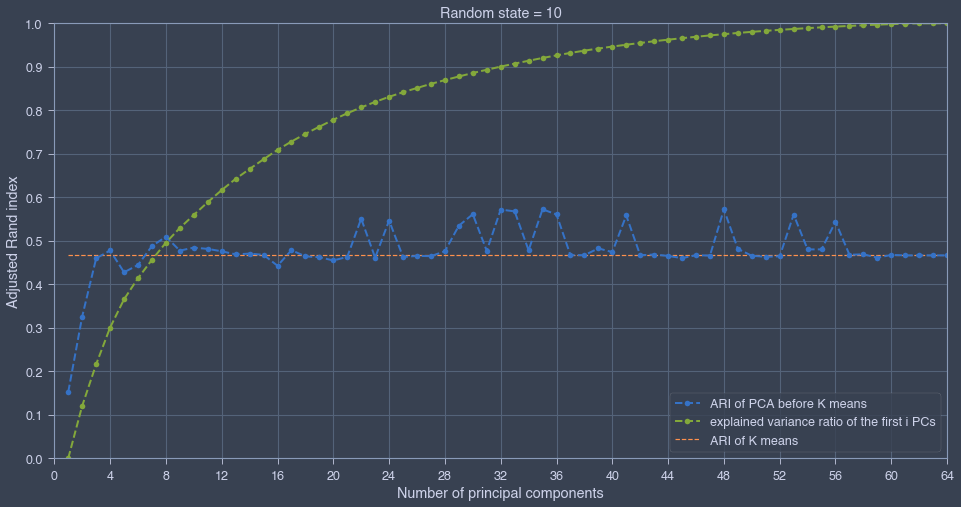

In [72]:

cum_ratio = np.zeros(num_features)
for i in np.arange(num_features):
    cum_ratio[i] = sum(pca.explained_variance_ratio_[:i])

plt.figure(figsize=(16, 8))
plt.ylim(0,1)
plt.xlim(0, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted Rand index")
plt.hlines(adjusted_rand_score(target, kmeans.labels_), 1, num_features, color = "y",linestyle='--', label = "ARI of K means")
plt.plot(np.arange(1, num_features+1), adRand, linestyle='--', marker='o', linewidth=2, label = "ARI of PCA before K means")
plt.plot(np.arange(1, num_features+1), cum_ratio, linestyle='--', marker='o', linewidth=2, label = "explained variance ratio of the first i PCs")
plt.legend(loc='lower right')
plt.title("Random state = {}".format(RS))
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)